# Facebook Ads

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
np.set_printoptions(formatter={'float': lambda x: "{:.2f}".format(x)})

In [3]:
training_set = pd.read_csv('FacebookAds.csv', encoding='ISO-8859-1')

In [4]:
training_set.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [5]:
training_set.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


## Functions 

In [7]:
def ScatterLinearRegression(X, Y):
    X1, X2 = np.meshgrid(np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01),
                         np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('magenta', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(Y)):
        plt.scatter(X[Y == j, 0], X[Y == j, 1],
            color=ListedColormap(('magenta', 'blue'))(i), label=j)
    plt.title('Facebook Ad: Customer Click Prediction')
    plt.xlabel('Time Spent on Site')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

## EDA

In [9]:
training_set['Clicked'].value_counts(normalize=True) * 100

Clicked
1    50.1002
0    49.8998
Name: proportion, dtype: float64

<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

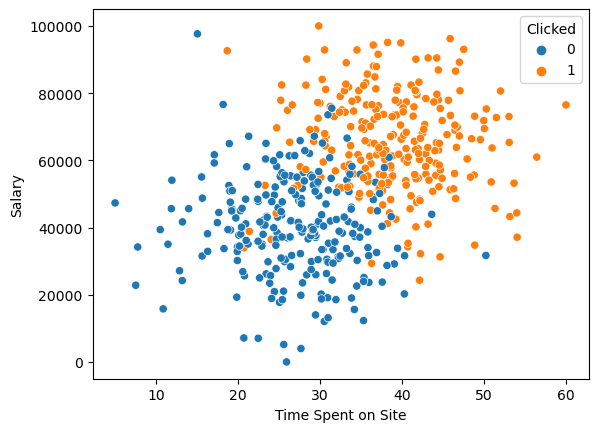

In [10]:
sns.scatterplot(x='Time Spent on Site', y='Salary', hue='Clicked', data=training_set)

<Axes: xlabel='Clicked', ylabel='Salary'>

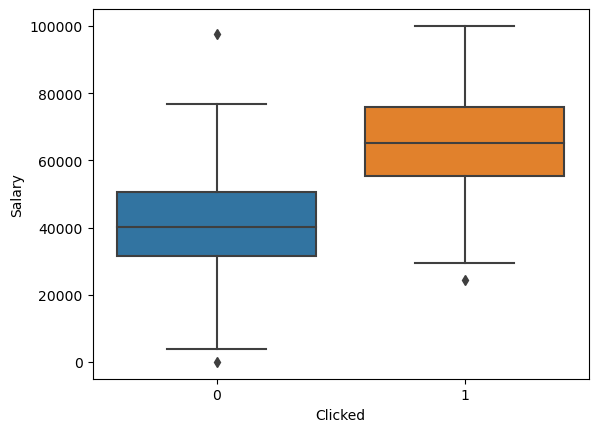

In [11]:
sns.boxplot(x='Clicked', y='Salary',data=training_set)

<Axes: xlabel='Clicked', ylabel='Time Spent on Site'>

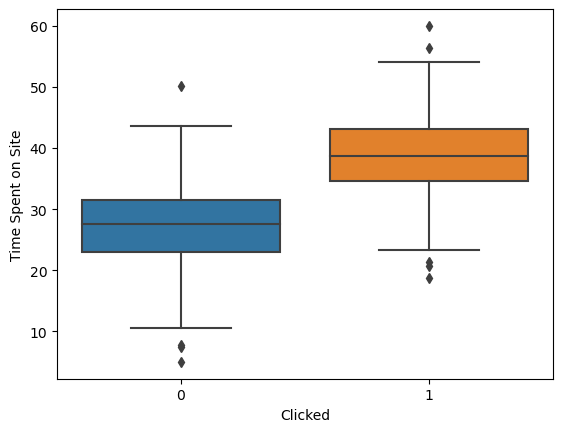

In [12]:
sns.boxplot(x='Clicked', y='Time Spent on Site',data=training_set)

<Axes: >

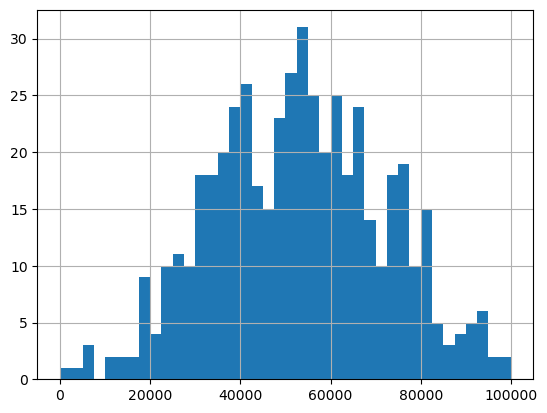

In [13]:
training_set['Salary'].hist(bins = 40)

<Axes: >

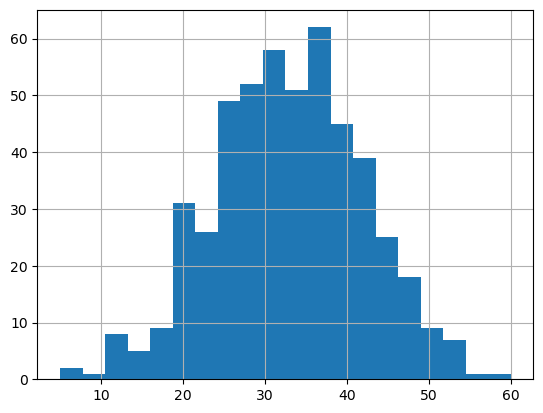

In [14]:
training_set['Time Spent on Site'].hist(bins = 20)

## Clean Data

In [16]:
training_set.drop(['Names', 'emails', 'Country'],axis=1,inplace=True)

In [17]:
training_set

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


## Model Training

In [19]:
X = training_set.drop('Clicked',axis=1).values
y = training_set['Clicked'].values

In [20]:
X

array([[25.65, 55330.06],
       [32.46, 79049.08],
       [20.95, 41098.61],
       [54.04, 37143.36],
       [34.25, 37355.11],
       [52.01, 80642.65],
       [42.88, 61908.40],
       [25.68, 29851.41],
       [40.70, 34281.12],
       [29.69, 41098.88],
       [33.27, 54127.02],
       [34.53, 30221.94],
       [25.31, 43764.00],
       [46.54, 48663.49],
       [37.72, 64695.98],
       [25.06, 17759.93],
       [41.10, 49463.38],
       [24.76, 38484.42],
       [48.87, 34774.44],
       [27.83, 51644.49],
       [17.10, 61661.77],
       [25.60, 53630.76],
       [42.25, 32215.10],
       [37.14, 51733.66],
       [32.44, 51677.70],
       [19.94, 34263.79],
       [39.82, 70503.31],
       [30.73, 67022.27],
       [24.04, 36474.71],
       [39.06, 29178.36],
       [31.25, 76064.38],
       [36.06, 65202.91],
       [19.91, 32894.52],
       [22.46, 47770.07],
       [36.77, 53464.43],
       [35.96, 23683.31],
       [41.99, 54726.99],
       [34.54, 78156.46],
       [24.8

In [21]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
X

array([[-0.80, 0.13],
       [-0.05, 1.38],
       [-1.32, -0.62],
       [2.32, -0.83],
       [0.15, -0.82],
       [2.10, 1.46],
       [1.10, 0.48],
       [-0.80, -1.21],
       [0.86, -0.98],
       [-0.36, -0.62],
       [0.04, 0.06],
       [0.18, -1.20],
       [-0.84, -0.48],
       [1.50, -0.22],
       [0.53, 0.62],
       [-0.86, -1.85],
       [0.90, -0.18],
       [-0.90, -0.76],
       [1.75, -0.96],
       [-0.56, -0.07],
       [-1.74, 0.46],
       [-0.81, 0.04],
       [1.03, -1.09],
       [0.46, -0.06],
       [-0.05, -0.06],
       [-1.43, -0.98],
       [0.76, 0.93],
       [-0.24, 0.74],
       [-0.98, -0.87],
       [0.67, -1.25],
       [-0.18, 1.22],
       [0.34, 0.65],
       [-1.43, -1.05],
       [-1.15, -0.27],
       [0.42, 0.03],
       [0.33, -1.54],
       [1.00, 0.10],
       [0.18, 1.33],
       [-0.89, -0.52],
       [0.62, 0.09],
       [-0.26, -2.15],
       [-0.44, -1.21],
       [0.89, -0.39],
       [-0.58, -1.09],
       [-1.52, -0.72],
   

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Model Testing

### Train

<Axes: >

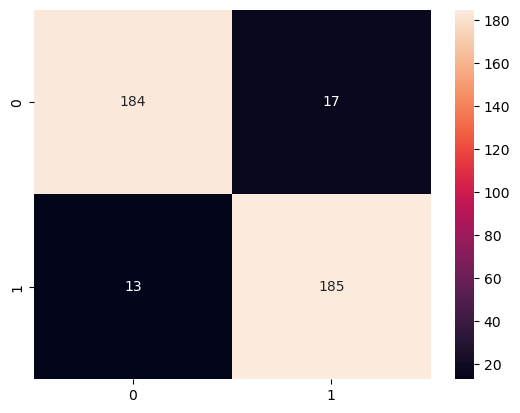

In [27]:
y_predict_train = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [58]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       201
           1       0.92      0.93      0.93       198

    accuracy                           0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399



### Test

<Axes: >

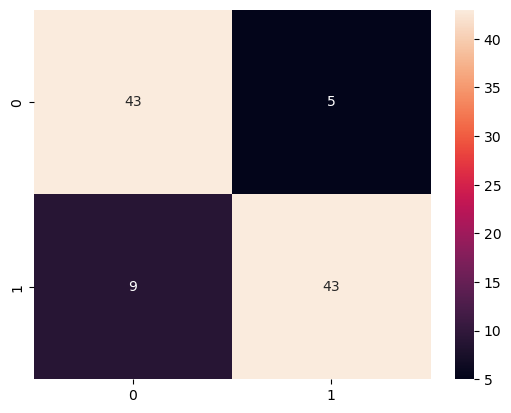

In [29]:
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [30]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



## Visualize Results 

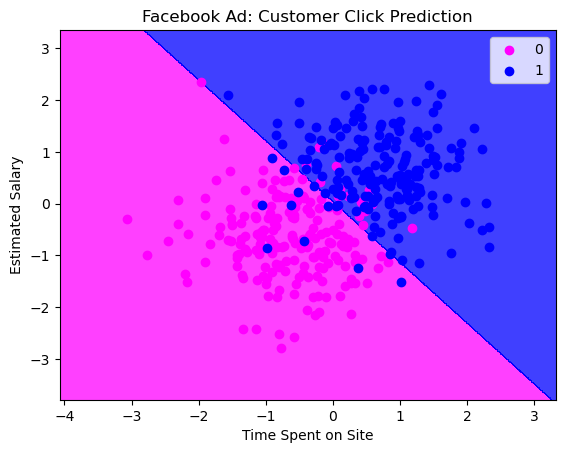

In [32]:
ScatterLinearRegression(X_train, y_train)

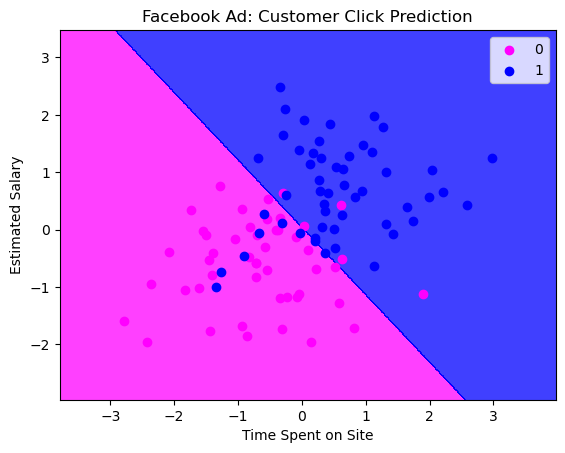

In [33]:
ScatterLinearRegression(X_test, y_test)